# Projecta #1 - Exploratory Data Analysis  (EDA)

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploracion Básica

1. Ver los primeros, ultimos, y un sample de registros / head(),tail(),sample()
2. Informacion del dataset / shape, info(), describe()
3. Conversione de tipos de datos y formatos

In [2]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020.0,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7588,6147600040,20150224T000000,163000.0,3,1.75,1290,4811,1.0,0,0,...,7,1290.0,0,1996,0,98032,47.3912,-122.234,1310,4811
6344,7276100020,20150414T000000,505000.0,4,1.00,1480,12675,1.5,0,0,...,7,1480.0,0,1929,0,98133,47.7630,-122.342,1820,7995
9669,6752601110,20140512T000000,357000.0,4,2.50,2380,7066,2.0,0,0,...,7,2380.0,0,1997,0,98031,47.3982,-122.172,2310,8127
13688,3271301175,20140815T000000,661000.0,2,1.00,1260,5800,1.0,0,0,...,7,1260.0,0,1939,0,98199,47.6501,-122.409,1830,5800
21550,880000205,20140729T000000,249000.0,3,2.00,1260,1125,2.0,0,0,...,7,810.0,450,2011,0,98106,47.5262,-122.361,1260,1172
13711,4039500610,20140820T000000,440000.0,3,1.75,1430,8400,1.0,0,0,...,7,1430.0,0,1961,0,98008,47.6073,-122.127,1570,7800
16833,9278200095,20141217T000000,465000.0,3,1.50,900,8690,1.5,0,0,...,6,900.0,0,1941,0,98116,47.5751,-122.393,1000,6150
15071,9276200635,20150430T000000,645000.0,3,1.75,1840,4255,1.0,0,0,...,7,940.0,900,1907,2005,98116,47.5800,-122.392,1600,4255
10834,871000435,20150509T000000,812000.0,4,2.00,2380,6122,1.0,0,2,...,8,1310.0,1070,1949,0,98199,47.6506,-122.405,1810,5202
16006,9265700005,20140822T000000,395000.0,3,1.75,1740,6220,1.0,0,0,...,6,1740.0,0,1954,0,98177,47.7620,-122.362,1630,8418


In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Cambiar formatos de columnas
pd.options.display.float_format = '{:.2f}'.format

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [10]:
#Transponer la tabla
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


## Análisis Univariable

In [12]:
# Total de casas analizadas
df.shape[0]

21613

In [13]:
#Total Zipcodes analizados
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [16]:
len(df['zipcode'].unique())

70

In [17]:
#ver numero de data unica por columna
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [18]:
#Buscar todos los datos nulos del dataset
df.isnull().sum().sum()

2

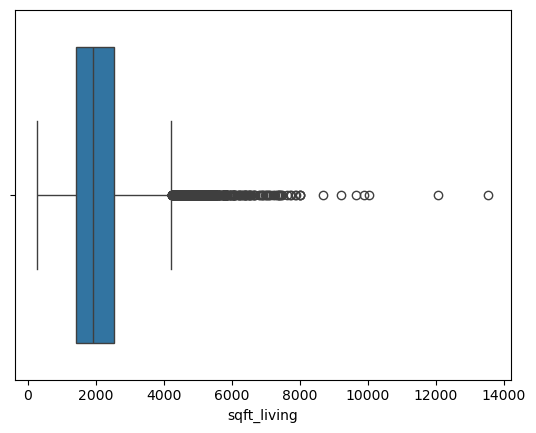

In [19]:
#grafico de boxplot para ver alta variacion
ax = sns.boxplot(x=df['sqft_living'])

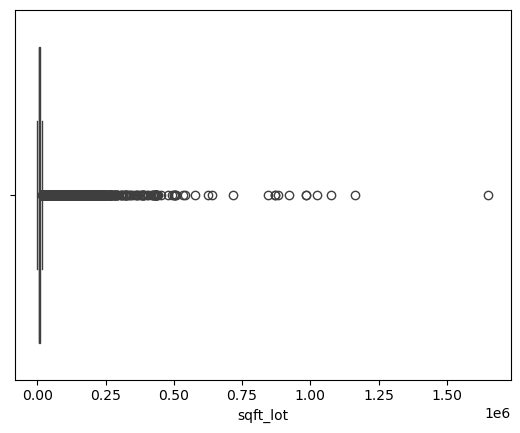

In [20]:
ax = sns.boxplot(x=df['sqft_lot'])

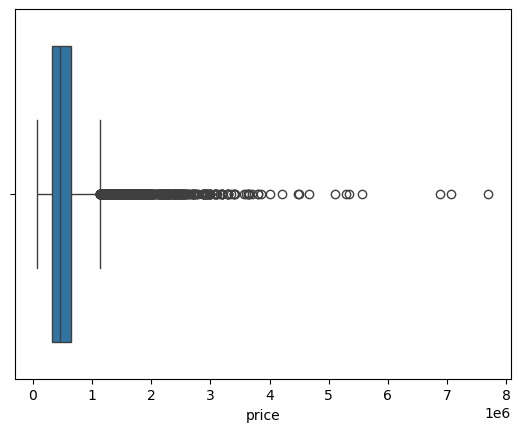

In [21]:
ax = sns.boxplot(x=df['price'])

## Análisis de Correlación

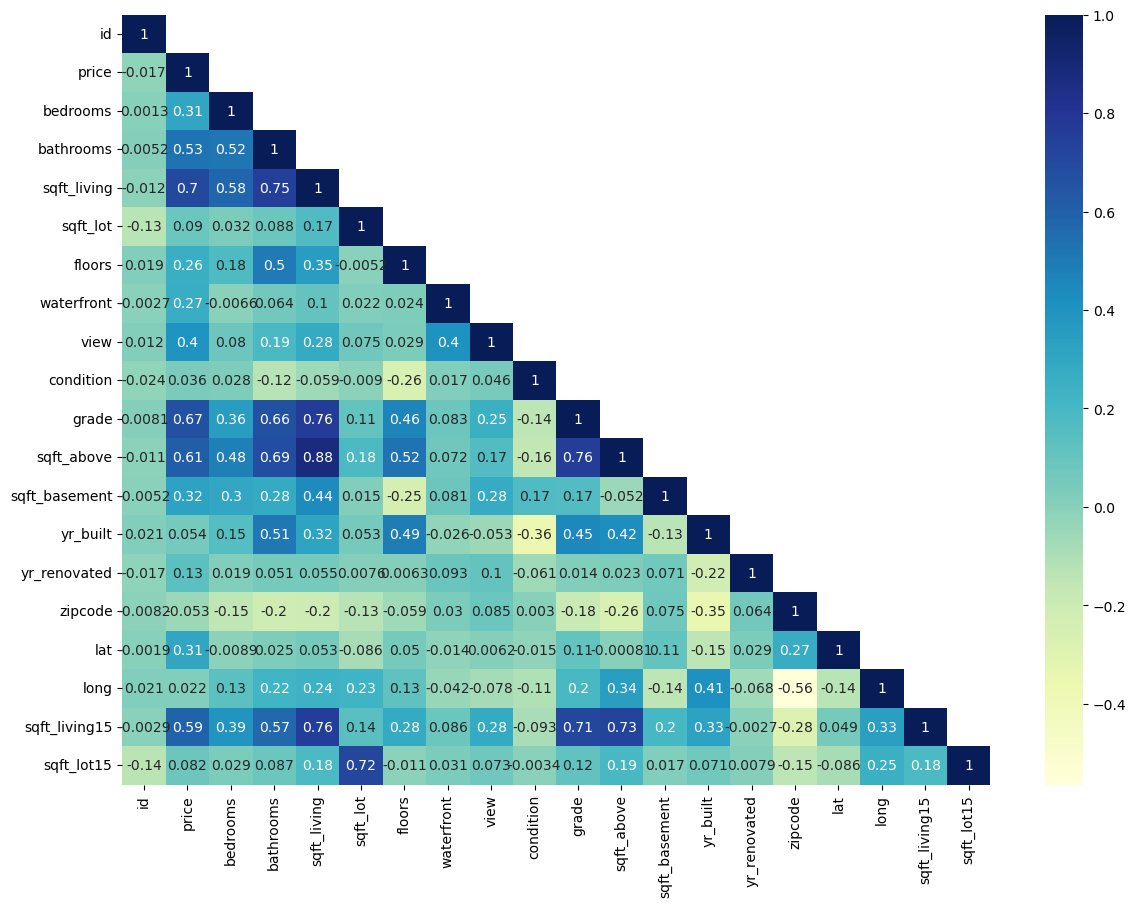

In [24]:
#Grafica de correlacion

df_num_vars = df.select_dtypes(include=[np.number])  # selecciona solo columnnas numericas

plt.figure(figsize=(14,10))
corr_df = corr = df_num_vars.corr(method="pearson")
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap="YlGnBu", annot=True)
plt.show()



In [25]:
df_num_vars.corr('pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


C:\Users\paob2\AppData\Local\Temp\ipykernel_56396\2808159431.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],ax=axes[i//4,i%4], kde=False)


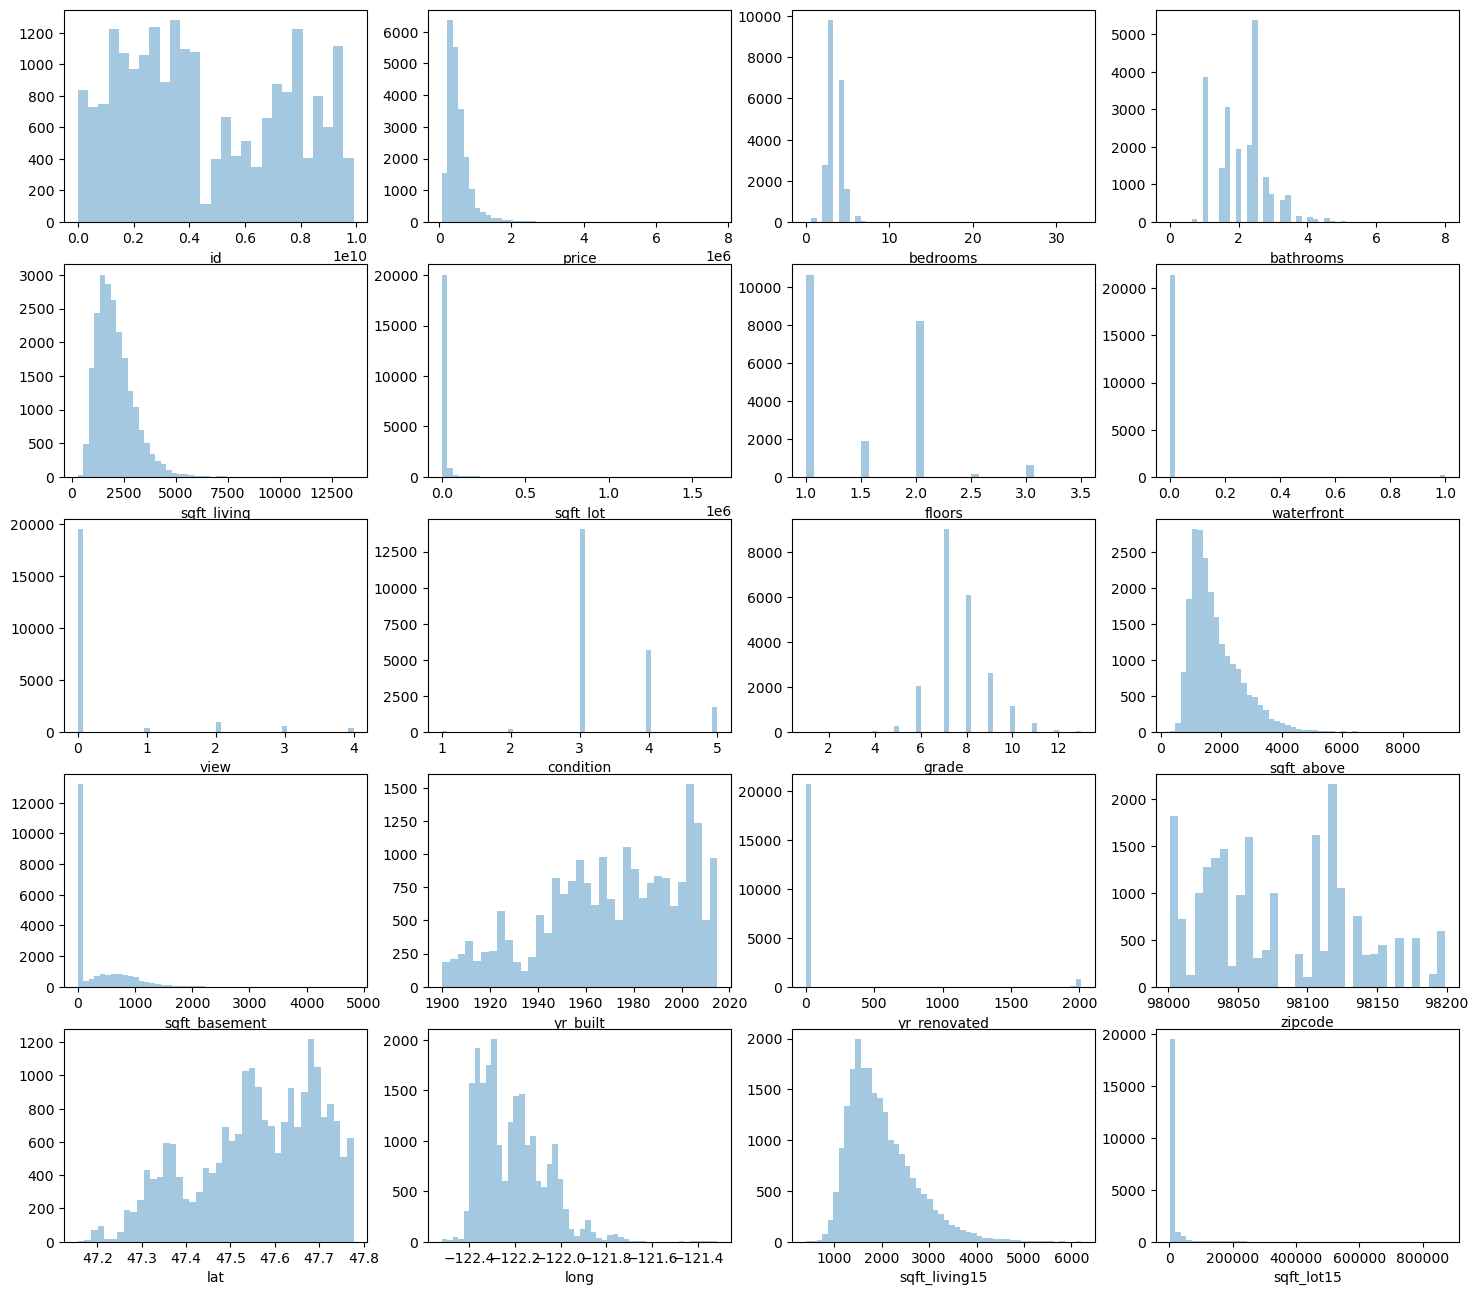

In [28]:
#grafica exploratoria de todas las columnas
cols_num =  df_num_vars.columns.tolist()

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.distplot(df[column],ax=axes[i//4,i%4], kde=False)



In [31]:
#Agrupamiento  Sirve mucho mirar comparaciones por una variable, revisando la mediana

df_num_vars.groupby(['waterfront']).median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,
0,3904935400.00,450000.00,3.00,2.25,1910.00,7588.50,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1830.00,7600.00
1,3761100045.00,1400000.00,3.00,2.50,2850.00,17342.00,2.00,4.00,3.00,9.00,2180.00,500.00,1960.00,0.00,98075.00,47.54,-122.28,2660.00,15959.00


In [32]:
df_num_vars.groupby(['floors']).median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,,
1.00,3884800600.50,390000.00,3.00,1.75,1630.00,8337.00,0.00,0.00,3.00,7.00,1260.00,200.00,1962.00,0.00,98070.00,47.56,-122.27,1680.00,8173.50
1.50,3856904632.50,524475.00,3.00,1.75,1760.00,5962.50,0.00,0.00,4.00,7.00,1530.00,0.00,1928.00,0.00,98115.00,47.63,-122.31,1660.00,5700.00
2.00,3982700125.00,542950.00,4.00,2.50,2440.00,7089.00,0.00,0.00,3.00,8.00,2311.00,0.00,1998.00,0.00,98055.00,47.56,-122.17,2260.00,7113.00
2.50,3751601877.00,799200.00,4.00,2.50,2850.00,5474.00,0.00,0.00,3.00,9.00,2710.00,60.00,1977.00,0.00,98106.00,47.62,-122.30,2240.00,5352.00
3.00,3448000410.00,490000.00,3.00,2.50,1500.00,1323.00,0.00,0.00,3.00,8.00,1480.00,0.00,2007.00,0.00,98109.00,47.67,-122.35,1470.00,1466.00
3.50,1972201219.00,534500.00,3.00,2.62,1730.00,1331.00,0.00,0.00,3.00,8.00,1730.00,0.00,2005.50,0.00,98104.00,47.65,-122.33,1405.00,1331.00


<Axes: xlabel='floors'>

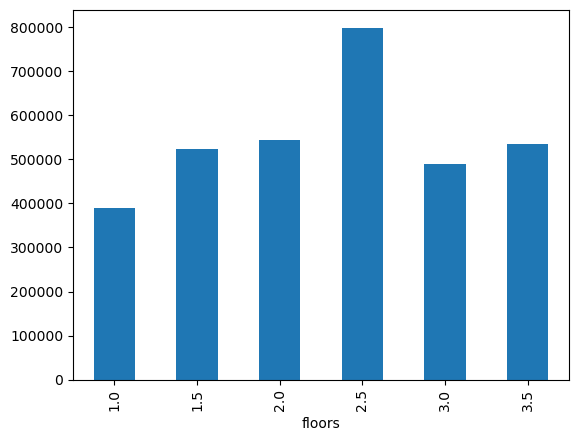

In [34]:
#Graficos de analisis rapido



df_num_vars.groupby(['floors']).median()['price'].plot.bar()

<Axes: xlabel='yr_built'>

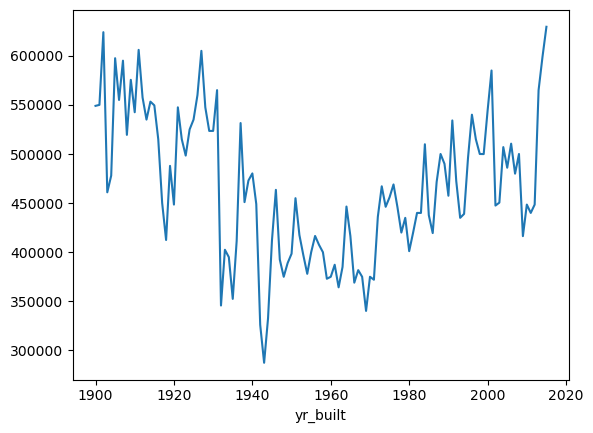

In [35]:
df_num_vars.groupby(['yr_built'])['price'].median().plot.line()

## Analisis Bivariado

In [36]:
pd.crosstab(df['waterfront'], df['floors'])

floors,1.00,1.50,2.00,2.50,3.00,3.50
waterfront,,,,,,
0,10623,1889,8166,159,605,8
1,57,21,75,2,8,0


In [37]:
# Porcentajes horizontales
pd.crosstab(df['waterfront'], df['floors'],normalize='index')

floors,1.00,1.50,2.00,2.50,3.00,3.50
waterfront,,,,,,
0,0.50,0.09,0.38,0.01,0.03,0.00
1,0.35,0.13,0.46,0.01,0.05,0.00


<Axes: xlabel='grade'>

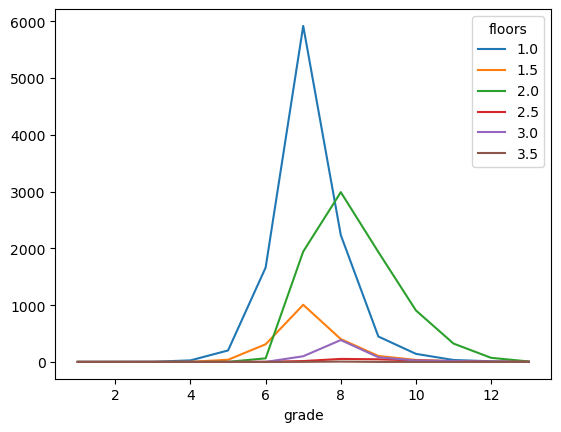

In [38]:
# grafica de texto
pd.crosstab(df['grade'], df['floors']).plot()

In [39]:
# Desglose de los datos segun pisos y score de la casa
pd.crosstab(df['grade'], df['floors'], margins=True, margins_name="Total")

floors,1.00,1.50,2.00,2.50,3.00,3.50,Total
grade,,,,,,,
1,1,0,0,0,0,0,1
3,3,0,0,0,0,0,3
4,27,2,0,0,0,0,29
5,202,38,2,0,0,0,242
6,1662,311,63,2,0,0,2038
7,5916,1006,1943,15,100,1,8981
8,2233,402,2989,53,385,6,6068
9,447,105,1935,46,82,0,2615
10,142,35,906,26,25,0,1134


In [41]:
#Visualizar el precio promedio segurn el grade y los pisos
dfct1 =  pd.crosstab(df['grade'], df['floors'], margins=True, margins_name="Total", values=df.price, aggfunc='mean')
dfct1 = dfct1.replace(np.nan, 0)
dfct1

floors,1.00,1.50,2.00,2.50,3.00,3.50,Total
grade,,,,,,,
1,142000.00,0.00,0.00,0.00,0.00,0.00,142000.00
3,205666.67,0.00,0.00,0.00,0.00,0.00,205666.67
4,216187.04,190000.00,0.00,0.00,0.00,0.00,214381.03
5,244425.53,270364.32,247500.00,0.00,0.00,0.00,248523.97
6,294411.45,341526.30,302590.71,361250.00,0.00,0.00,301919.64
7,390574.93,503890.61,386962.93,516613.27,373947.39,1095000.00,402590.26
8,552791.38,696781.78,519103.51,643799.36,495449.12,511916.67,542852.77
9,856428.37,950667.83,740172.50,940176.52,787944.76,0.00,773513.19
10,1161105.12,1271418.57,1033278.10,1537926.92,1195030.60,0.00,1071771.07


In [42]:
# se muestra la tabla con gradientes
dfct1.style.background_gradient(cmap="Greens")\
    .set_properties(**{'font-size':'10px'})

floors,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,Total
grade,,,,,,,
1,142000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142000.000000
3,205666.666667,0.000000,0.000000,0.000000,0.000000,0.000000,205666.666667
4,216187.037037,190000.000000,0.000000,0.000000,0.000000,0.000000,214381.034483
5,244425.529703,270364.315789,247500.000000,0.000000,0.000000,0.000000,248523.971074
6,294411.447653,341526.302251,302590.714286,361250.000000,0.000000,0.000000,301919.637390
7,390574.927485,503890.614314,386962.933093,516613.266667,373947.390000,1095000.000000,402590.262332
8,552791.376623,696781.776119,519103.507862,643799.358491,495449.124675,511916.666667,542852.765656
9,856428.369128,950667.828571,740172.500258,940176.521739,787944.756098,0.000000,773513.185851
10,1161105.119718,1271418.571429,1033278.097130,1537926.923077,1195030.600000,0.000000,1071771.074074


## Descubrimientos

In [45]:
#numero de casas por año
df.groupby('yr_built')['yr_built'].count()

yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

<Axes: xlabel='yr_built'>

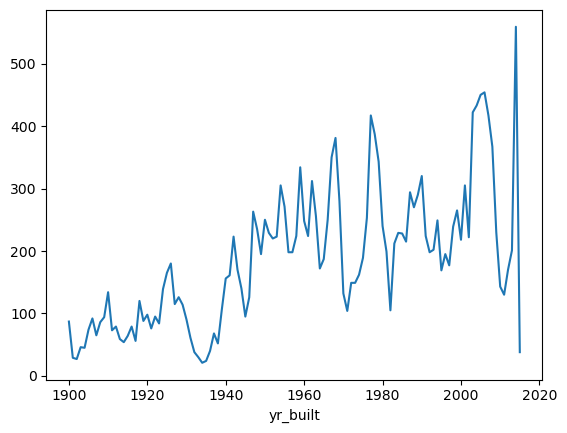

In [46]:
df.groupby('yr_built')['yr_built'].count().plot()

<Axes: ylabel='zipcode'>

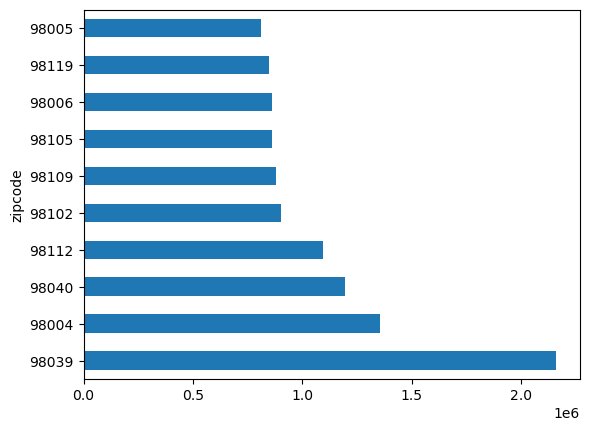

In [47]:
# Ranking de 10 zipcodes mas caros

df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).plot.barh()

In [49]:
df.head(9)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890.00,1530,2001,0,98053,47.66,-122.00,4760,101930
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,7,1715.00,0,1995,0,98003,47.31,-122.33,2238,6819
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,7,1060.00,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,7,1050.00,730,1960,0,98146,47.51,-122.34,1780,8113


In [51]:
#Top 50 de los mejores valores del dataset
df2 = df.groupby(['zipcode','waterfront'])['price'].mean().sort_values(ascending=False).head()
df2.head()

zipcode  waterfront
98004    1            7062500.00
98039    1            3640900.00
98033    1            3444950.00
98105    1            3051666.67
98040    1            2960416.67
Name: price, dtype: float64

In [52]:
# clasifica por waterfront
df2.unstack().head(10)

waterfront,1
zipcode,
98004,7062500.00
98039,3640900.00
98033,3444950.00
98105,3051666.67
98040,2960416.67
